In [1]:
import pandas as pd
import numpy as np

df = pd.DataFrame(columns = ['Age'], index = np.arange(1,14))
df['Age'] = [1, 1, 2, 3, 3, 3, 2, 1, 1, 3, 1, 2, 2]
df['Incoming'] = [3, 3, 3, 2, 1, 1, 1, 2, 1, 2, 2, 2, 3]
df['Student'] = [1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2]
df['Credit Rating'] = [2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2]
df['Buying'] = [1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2]
df = df.rename_axis('User id').reset_index()
df

,User id,Age,Incoming,Student,Credit Rating,Buying
0,1,1,3,1,2,1
1,2,1,3,1,1,1
2,3,2,3,1,2,2
3,4,3,2,1,2,2
4,5,3,1,2,2,2
5,6,3,1,2,1,1
6,7,2,1,2,1,2
7,8,1,2,1,2,1
8,9,1,1,2,2,2
9,10,3,2,2,2,2


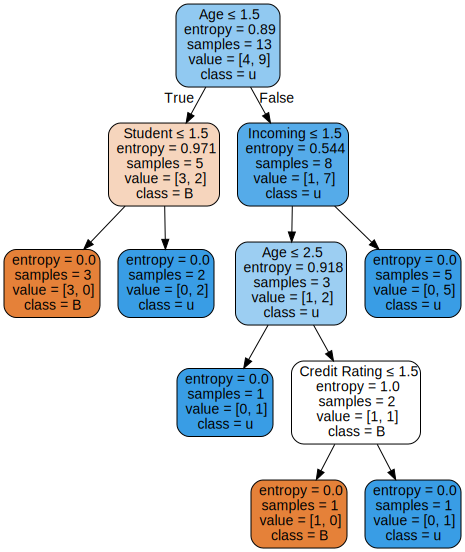

In [2]:
# 决策树 conda install python-graphviz
from sklearn import tree
import graphviz

Var = ['Age', 'Incoming', 'Student', 'Credit Rating']
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf.fit(df[Var].values, df['Buying'])
def plot_tree(clf, fn, cn):
    dot_data = tree.export_graphviz(clf,
                                    out_file = None,
                                    feature_names = fn,
                                    class_names = cn,
                                    filled = True,
                                    rounded = True,
                                    special_characters = True)
    graph = graphviz.Source(dot_data)
    graph.render('graph')
    return graph

plot_tree(clf, Var, 'Buying')

In [3]:
# 预测 Age = 3, Incoming = 2, Student = 1, Credit Rating = 1的Buying结果
print('年龄(50), 收入（Medium）,非学生，信用记录 (excellent)的新用户会购买产品，Buying = ',clf.predict([[3, 2, 1, 1]])[0], '(yes).')

年龄(50), 收入（Medium）,非学生，信用记录 (excellent)的新用户会购买产品，Buying =  2 (yes).
